In [4]:
import pandas as pd
import plotly.express as pe

In [5]:
df=pd.read_excel("guest_data_with_reviews.xlsx")
df.head()

,ID,Start time,Completion time,Email,Name,Full Name,Gender,Date of Birth,Checkout Date,Purpose of the visit,...,How likely are you to recommend us to a friend or colleague?,Staff attitude,Check-in Process,Room service,Room cleanliness,Food quality,Variety of food,Broadband & TV,Gym,Review
0,1,NaN,NaN,NaN,NaN,Guest 00001,Male,1993-10-02,2022-04-07,Business,...,9,Good,Good,Very good,Poor,Very good,Average,Excellent,Excellent,it was an okay experience overall. the room wa...
1,3,NaN,NaN,NaN,NaN,Guest 00003,Male,1981-10-03,2020-01-16,Vacation,...,4,Poor,Good,Very good,Average,Poor,Poor,Good,Very good,the stay was memorable thanks to the poor staf...
2,4,NaN,NaN,NaN,NaN,Guest 00004,Male,2004-03-31,2022-05-14,Vacation,...,6,Good,Very good,Good,Poor,Average,Poor,Poor,Excellent,while the staff were good and did their best t...
3,5,NaN,NaN,NaN,NaN,Guest 00005,Male,1961-08-08,2022-06-24,Business,...,5,Excellent,Excellent,Very good,Average,Good,Average,Excellent,Good,the hotel experience was average at best. the ...
4,8,NaN,NaN,NaN,NaN,Guest 00008,Male,1981-11-27,2020-02-01,Business,...,7,Good,Excellent,Good,Average,Excellent,Very good,Excellent,Very good,"not my favorite stay, but the good staff helpe..."


In [6]:
total_length=len(df)
total_length

1108

In [7]:
missing_values = df.isnull().sum()
missing_values

,0
ID,0
Start time,1108
Completion time,1108
Email,1108
Name,1108
Full Name,0
Gender,0
Date of Birth,0
Checkout Date,0
Purpose of the visit,0


In [8]:
df_cleaned = df.dropna(axis = 1,how='all')
df_cleaned=df_cleaned.dropna()
df_cleaned.head()

,ID,Full Name,Gender,Date of Birth,Checkout Date,Purpose of the visit,How did you discover us?,Rate your overall experience in our hotel,How likely are you to recommend us to a friend or colleague?,Staff attitude,Check-in Process,Room service,Room cleanliness,Food quality,Variety of food,Broadband & TV,Gym,Review
0,1,Guest 00001,Male,1993-10-02,2022-04-07,Business,Organization,3,9,Good,Good,Very good,Poor,Very good,Average,Excellent,Excellent,it was an okay experience overall. the room wa...
1,3,Guest 00003,Male,1981-10-03,2020-01-16,Vacation,News paper,4,4,Poor,Good,Very good,Average,Poor,Poor,Good,Very good,the stay was memorable thanks to the poor staf...
2,4,Guest 00004,Male,2004-03-31,2022-05-14,Vacation,Search engine,5,6,Good,Very good,Good,Poor,Average,Poor,Poor,Excellent,while the staff were good and did their best t...
3,5,Guest 00005,Male,1961-08-08,2022-06-24,Business,hotel booking sites,5,5,Excellent,Excellent,Very good,Average,Good,Average,Excellent,Good,the hotel experience was average at best. the ...
4,8,Guest 00008,Male,1981-11-27,2020-02-01,Business,Organization,1,7,Good,Excellent,Good,Average,Excellent,Very good,Excellent,Very good,"not my favorite stay, but the good staff helpe..."


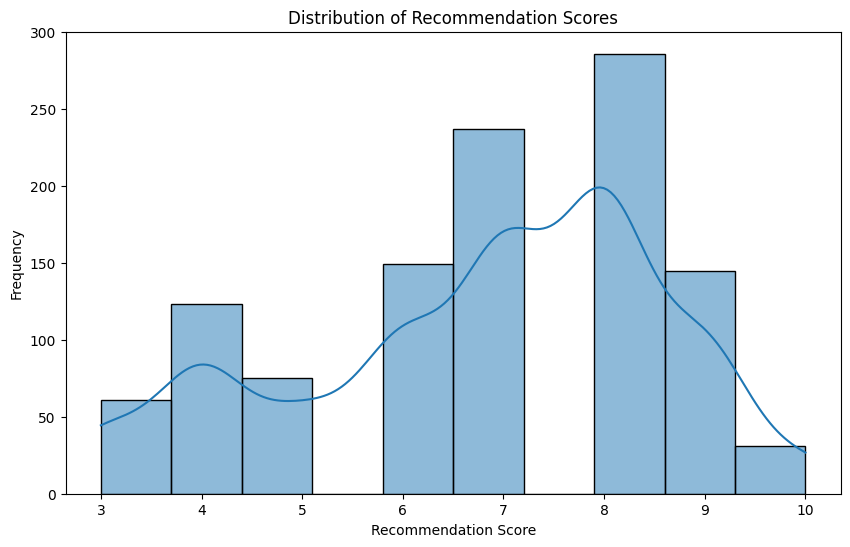

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned["How likely are you to recommend us to a friend or colleague?"], bins=10, kde=True)
plt.title("Distribution of Recommendation Scores")
plt.xlabel("Recommendation Score")
plt.ylabel("Frequency")
plt.show()

In [10]:
import plotly.express as px

# Plot the distribution of recommendation scores using plotly
fig = px.histogram(df_cleaned,
                   x="How likely are you to recommend us to a friend or colleague?",
                   nbins=10,
                   title="Distribution of Recommendation Scores",
                   labels={"How likely are you to recommend us to a friend or colleague?": "Recommendation Score"},
                   marginal="box")

fig.update_layout(
    xaxis_title="Recommendation Score",
    yaxis_title="Frequency"
)

fig.show()

In [11]:
# Classify scores as promoters (9-10), passives (7-8), and detractors (0-6)
def classify_nps(score):
    if score >= 9:
        return 'Promoter'
    elif score >= 7:
        return 'Passive'
    else:
        return 'Detractor'

# Apply the classification to the dataframe
df_cleaned['NPS Category'] = df_cleaned["How likely are you to recommend us to a friend or colleague?"].apply(classify_nps)

# Display the first few rows to verify the new column
df_cleaned.head()

,ID,Full Name,Gender,Date of Birth,Checkout Date,Purpose of the visit,How did you discover us?,Rate your overall experience in our hotel,How likely are you to recommend us to a friend or colleague?,Staff attitude,Check-in Process,Room service,Room cleanliness,Food quality,Variety of food,Broadband & TV,Gym,Review,NPS Category
0,1,Guest 00001,Male,1993-10-02,2022-04-07,Business,Organization,3,9,Good,Good,Very good,Poor,Very good,Average,Excellent,Excellent,it was an okay experience overall. the room wa...,Promoter
1,3,Guest 00003,Male,1981-10-03,2020-01-16,Vacation,News paper,4,4,Poor,Good,Very good,Average,Poor,Poor,Good,Very good,the stay was memorable thanks to the poor staf...,Detractor
2,4,Guest 00004,Male,2004-03-31,2022-05-14,Vacation,Search engine,5,6,Good,Very good,Good,Poor,Average,Poor,Poor,Excellent,while the staff were good and did their best t...,Detractor
3,5,Guest 00005,Male,1961-08-08,2022-06-24,Business,hotel booking sites,5,5,Excellent,Excellent,Very good,Average,Good,Average,Excellent,Good,the hotel experience was average at best. the ...,Detractor
4,8,Guest 00008,Male,1981-11-27,2020-02-01,Business,Organization,1,7,Good,Excellent,Good,Average,Excellent,Very good,Excellent,Very good,"not my favorite stay, but the good staff helpe...",Passive


In [12]:
# Calculate the proportion of customers in each NPS category
nps_proportions = df_cleaned['NPS Category'].value_counts(normalize=True) * 100

# Display the proportions
nps_proportions

,proportion
NPS Category,
Passive,47.244806
Detractor,36.856369
Promoter,15.898826


In [13]:
# Calculate the number of promoters, passives, and detractors
promoters = df_cleaned[df_cleaned['NPS Category'] == 'Promoter'].shape[0]
passives = df_cleaned[df_cleaned['NPS Category'] == 'Passive'].shape[0]
detractors = df_cleaned[df_cleaned['NPS Category'] == 'Detractor'].shape[0]

# Calculate the total number of responses
total_responses = df_cleaned.shape[0]

# Calculate the NPS score
nps_score = ((promoters - detractors) / total_responses) * 100

# Display the NPS score
nps_score

-20.957542908762424

In [14]:
if nps_score > 50:
    loyalty_interpretation = "Excellent customer loyalty"
elif nps_score > 0:
    loyalty_interpretation = "Good customer loyalty"
else:
    loyalty_interpretation = "Poor customer loyalty"

loyalty_interpretation

'Poor customer loyalty'

Sentiment Analysis using a pretrained model

In [15]:
!pip install tf-keras

In [16]:
from transformers import pipeline

# Load pre-trained sentiment-analysis model
sentiment_analyzer = pipeline('sentiment-analysis')

# Analyze sentiments in the reviews
df_cleaned['Sentiment'] = df_cleaned['Review'].apply(lambda review: sentiment_analyzer(review)[0]['label'])

# Display the dataframe with the new Sentiment column
df_cleaned.head()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,ID,Full Name,Gender,Date of Birth,Checkout Date,Purpose of the visit,How did you discover us?,Rate your overall experience in our hotel,How likely are you to recommend us to a friend or colleague?,Staff attitude,Check-in Process,Room service,Room cleanliness,Food quality,Variety of food,Broadband & TV,Gym,Review,NPS Category,Sentiment
0,1,Guest 00001,Male,1993-10-02,2022-04-07,Business,Organization,3,9,Good,Good,Very good,Poor,Very good,Average,Excellent,Excellent,it was an okay experience overall. the room wa...,Promoter,POSITIVE
1,3,Guest 00003,Male,1981-10-03,2020-01-16,Vacation,News paper,4,4,Poor,Good,Very good,Average,Poor,Poor,Good,Very good,the stay was memorable thanks to the poor staf...,Detractor,NEGATIVE
2,4,Guest 00004,Male,2004-03-31,2022-05-14,Vacation,Search engine,5,6,Good,Very good,Good,Poor,Average,Poor,Poor,Excellent,while the staff were good and did their best t...,Detractor,NEGATIVE
3,5,Guest 00005,Male,1961-08-08,2022-06-24,Business,hotel booking sites,5,5,Excellent,Excellent,Very good,Average,Good,Average,Excellent,Good,the hotel experience was average at best. the ...,Detractor,NEGATIVE
4,8,Guest 00008,Male,1981-11-27,2020-02-01,Business,Organization,1,7,Good,Excellent,Good,Average,Excellent,Very good,Excellent,Very good,"not my favorite stay, but the good staff helpe...",Passive,POSITIVE


In [19]:
import plotly.express as px
df_sentiment = df_cleaned['Sentiment'].value_counts().reset_index()
df_sentiment.columns = ['Sentiment','Count']

fig = px.bar(df_sentiment, x='Sentiment', y='Count',
             labels={'Sentiment': 'Sentiment', 'Count': 'Count'},
             title='Sentiment Distribution')
fig.show()

In [20]:
# Calculate the percentage of each sentiment
df_sentiment['Percentage'] = (df_sentiment['Count'] / df_sentiment['Count'].sum()) * 100

# Display the sentiment distribution with percentages
df_sentiment

,Sentiment,Count,Percentage
0,NEGATIVE,829,74.887082
1,POSITIVE,278,25.112918


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Extract the reviews from the dataframe
reviews = df_cleaned['Review'].dropna().tolist()

# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=20)

# Fit and transform the reviews
X = vectorizer.fit_transform(reviews)

# Get the feature names (keywords)
keywords = vectorizer.get_feature_names_out()

# Sum up the counts of each keyword
keyword_counts = X.toarray().sum(axis=0)

# Create a dataframe for the keywords and their counts
df_keywords = pd.DataFrame({'Keyword': keywords, 'Count': keyword_counts})

# Sort the dataframe by count in descending order
df_keywords = df_keywords.sort_values(by='Count', ascending=False)

# Display the dataframe
df_keywords

,Keyword,Count
15,room,1107
8,food,1002
9,good,996
16,staff,896
17,stay,456
7,experience,454
3,cleanliness,403
2,best,314
5,excellent,307
19,wasn,306


In [22]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the reviews
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)

# Initialize the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)

# Fit the LDA model to the tfidf matrix
lda.fit(tfidf_matrix)

# Get the topics and their top words
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f"Topic {topic_idx+1}"] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topics

# Display the topics
no_top_words = 10
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
topics = display_topics(lda, tfidf_feature_names, no_top_words)
topics

{'Topic 1': ['ups',
  'touch',
  'left',
  'hoped',
  'nice',
  'quite',
  'desired',
  'downs',
  'improvement',
  'short'],
 'Topic 2': ['work',
  'use',
  'tried',
  'bit',
  'make',
  'okay',
  'approach',
  'overall',
  'good',
  'experience'],
 'Topic 3': ['subpar',
  'stood',
  'dragged',
  'lackluster',
  'nature',
  'overall',
  'cleanliness',
  'experience',
  'staff',
  'food'],
 'Topic 4': ['best',
  'upgrades',
  'returning',
  'need',
  'significant',
  'favorite',
  'consider',
  'helped',
  'stay',
  'wasn'],
 'Topic 5': ['didn',
  'quality',
  'team',
  'cleanliness',
  'thanks',
  'unfortunately',
  'memorable',
  'match',
  'leave',
  'liked']}

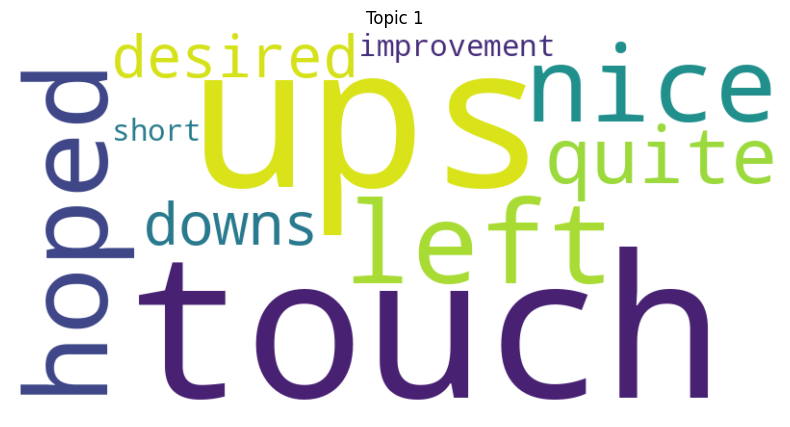

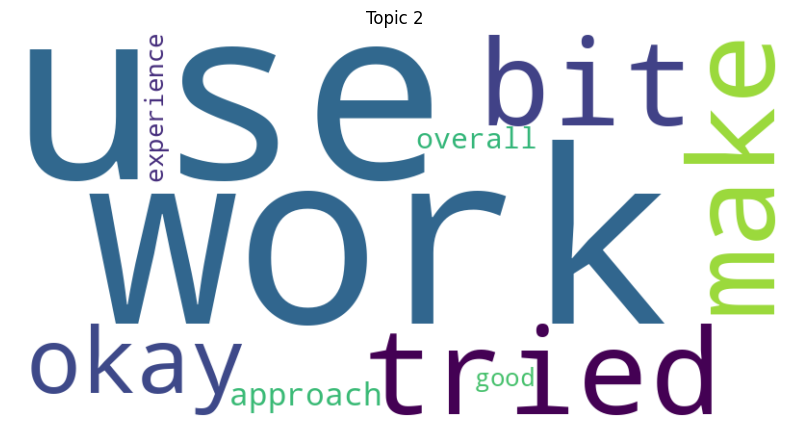

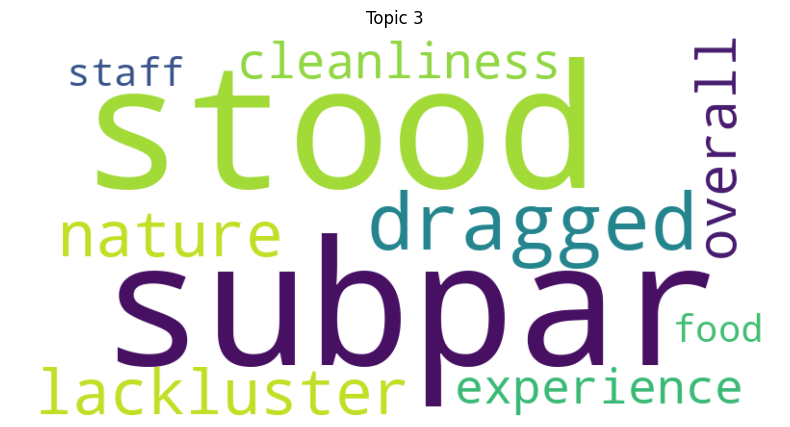

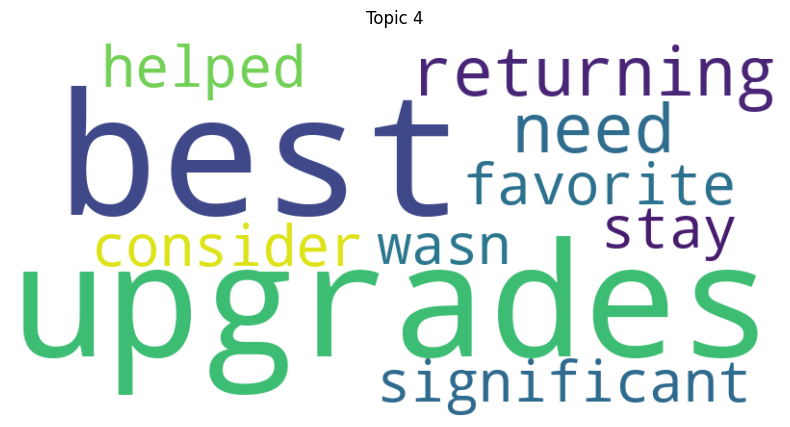

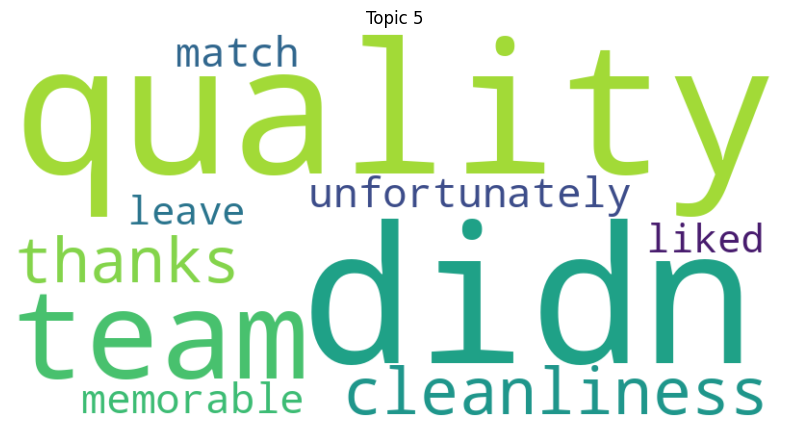

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to plot word cloud for each topic
def plot_word_cloud(lda_model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(lda_model.components_):
        word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-num_top_words - 1:-1]}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic {topic_idx+1}')
        plt.show()

# Plot word clouds for each topic
plot_word_cloud(lda, tfidf_feature_names, no_top_words)